In [1]:
from google.colab import drive

In [2]:
drive.mount("/content/gdrive")

Mounted at /content/gdrive


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import re
import nltk
import string

from nltk.corpus import stopwords
from nltk.stem import LancasterStemmer
from sklearn.feature_extraction.text import TfidfVectorizer

from sklearn.preprocessing import OneHotEncoder
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.naive_bayes import MultinomialNB
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report

In [ ]:
def handle_bad_lines(bad_line):
    print(f"Bad line: {bad_line}")

try:
    train_data = pd.read_csv("/content/gdrive/MyDrive/INTERNSHIP/codsoft/dataset/Genre Classification Dataset/train_data.txt",
                       sep=':::',
                       engine='python',
                       names=['Title', 'Genre', 'Description'],
                       on_bad_lines=handle_bad_lines)
except pd.errors.ParserError as e:
    print("ParserError:", e)


train_data.head(10)


,Title,Genre,Description
1,Oscar et la dame rose (2009),drama,Listening in to a conversation between his do...
2,Cupid (1997),thriller,A brother and sister with a past incestuous r...
3,"Young, Wild and Wonderful (1980)",adult,As the bus empties the students for their fie...
4,The Secret Sin (1915),drama,To help their unemployed father make ends mee...
5,The Unrecovered (2007),drama,The film's title refers not only to the un-re...
6,Quality Control (2011),documentary,Quality Control consists of a series of 16mm ...
7,"""Pink Slip"" (2009)",comedy,In tough economic times Max and Joey have all...
8,One Step Away (1985),crime,Ron Petrie (Keanu Reeves) is a troubled teen ...
9,"""Desperate Hours"" (2016)",reality-tv,"A sudden calamitous event, causing great loss..."
10,Spirits (2014/I),horror,Four high school students embark on a terrify...


In [ ]:
def handle_bad_lines(bad_line):
    print(f"Bad line: {bad_line}")

try:
    test_data = pd.read_csv("/content/gdrive/MyDrive/INTERNSHIP/codsoft/dataset/Genre Classification Dataset/test_data.txt",
                       sep=':::',
                       engine='python',
                       names=['Title', 'Genre', 'Description'],
                       on_bad_lines=handle_bad_lines)
except pd.errors.ParserError as e:
    print("ParserError:", e)


test_data.head(10)

,Title,Genre,Description
0,1,Edgar's Lunch (1998),"L.R. Brane loves his life - his car, his apar..."
1,2,La guerra de papá (1977),"Spain, March 1964: Quico is a very naughty ch..."
2,3,Off the Beaten Track (2010),One year in the life of Albin and his family ...
3,4,Meu Amigo Hindu (2015),"His father has died, he hasn't spoken with hi..."
4,5,Er nu zhai (1955),Before he was known internationally as a mart...
5,6,Riddle Room (2016),Emily Burns is being held captive in a room w...
6,7,L'amica (1969),The beautiful but neglected wife of a brillia...
7,8,Ina Mina Dika (1989),Vasu Inamdar (Ina) suffers from a disorder wh...
8,9,Equinox Special: Britain's Tornados (2005),An insight into the tornados that hit Kensal ...
9,10,Press (2011),Press is a story of young people overwhelmed ...


In [ ]:
def handle_bad_lines(bad_line):
    print(f"Bad line: {bad_line}")

try:
    test_data_solution = pd.read_csv("/content/gdrive/MyDrive/INTERNSHIP/codsoft/dataset/Genre Classification Dataset/test_data_solution.txt",
                       sep=':::',
                       engine='python',
                       names=['Title', 'Genre', 'Description'],
                       on_bad_lines=handle_bad_lines)
except pd.errors.ParserError as e:
    print("ParserError:", e)


test_data_solution.head(10)

,Title,Genre,Description
1,Edgar's Lunch (1998),thriller,"L.R. Brane loves his life - his car, his apar..."
2,La guerra de papá (1977),comedy,"Spain, March 1964: Quico is a very naughty ch..."
3,Off the Beaten Track (2010),documentary,One year in the life of Albin and his family ...
4,Meu Amigo Hindu (2015),drama,"His father has died, he hasn't spoken with hi..."
5,Er nu zhai (1955),drama,Before he was known internationally as a mart...
6,Riddle Room (2016),horror,Emily Burns is being held captive in a room w...
7,L'amica (1969),drama,The beautiful but neglected wife of a brillia...
8,Ina Mina Dika (1989),comedy,Vasu Inamdar (Ina) suffers from a disorder wh...
9,Equinox Special: Britain's Tornados (2005),documentary,An insight into the tornados that hit Kensal ...
10,Press (2011),drama,Press is a story of young people overwhelmed ...


In [ ]:
train_data.Genre.value_counts()

Genre
 drama           13613
 documentary     13096
 comedy           7447
 short            5073
 horror           2204
 thriller         1591
 action           1315
 western          1032
 reality-tv        884
 family            784
 adventure         775
 music             731
 romance           672
 sci-fi            647
 adult             590
 crime             505
 animation         498
 sport             432
 talk-show         391
 fantasy           323
 mystery           319
 musical           277
 biography         265
 history           243
 game-show         194
 news              181
 war               132
Name: count, dtype: int64

<ipython-input-23-e3967934d931>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=train_data, y='Genre', order=train_data['Genre'].value_counts().index, palette='viridis')


Text(0, 0.5, 'Distribution of Genres')

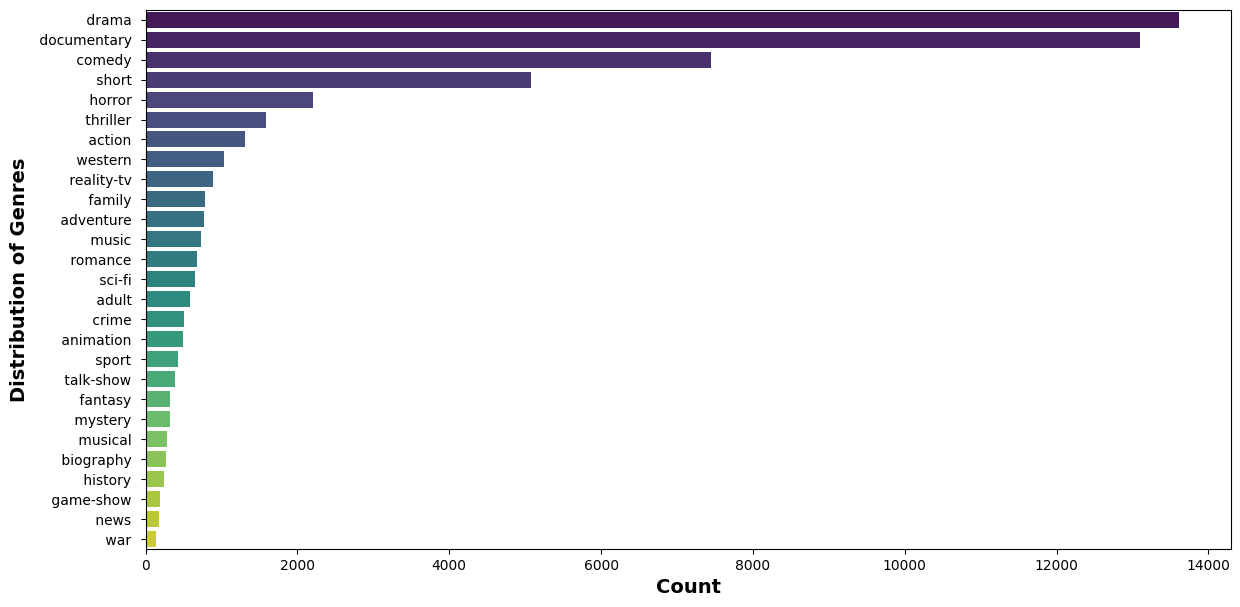

In [ ]:
plt.figure(figsize=(14, 7))
sns.countplot(data=train_data, y='Genre', order=train_data['Genre'].value_counts().index, palette='viridis')
plt.xlabel('Count', fontsize=14, fontweight='bold')
plt.ylabel('Distribution of Genres', fontsize=14, fontweight='bold')

<ipython-input-24-f4fb1a14657c>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=counts.index, y=counts, palette='mako')


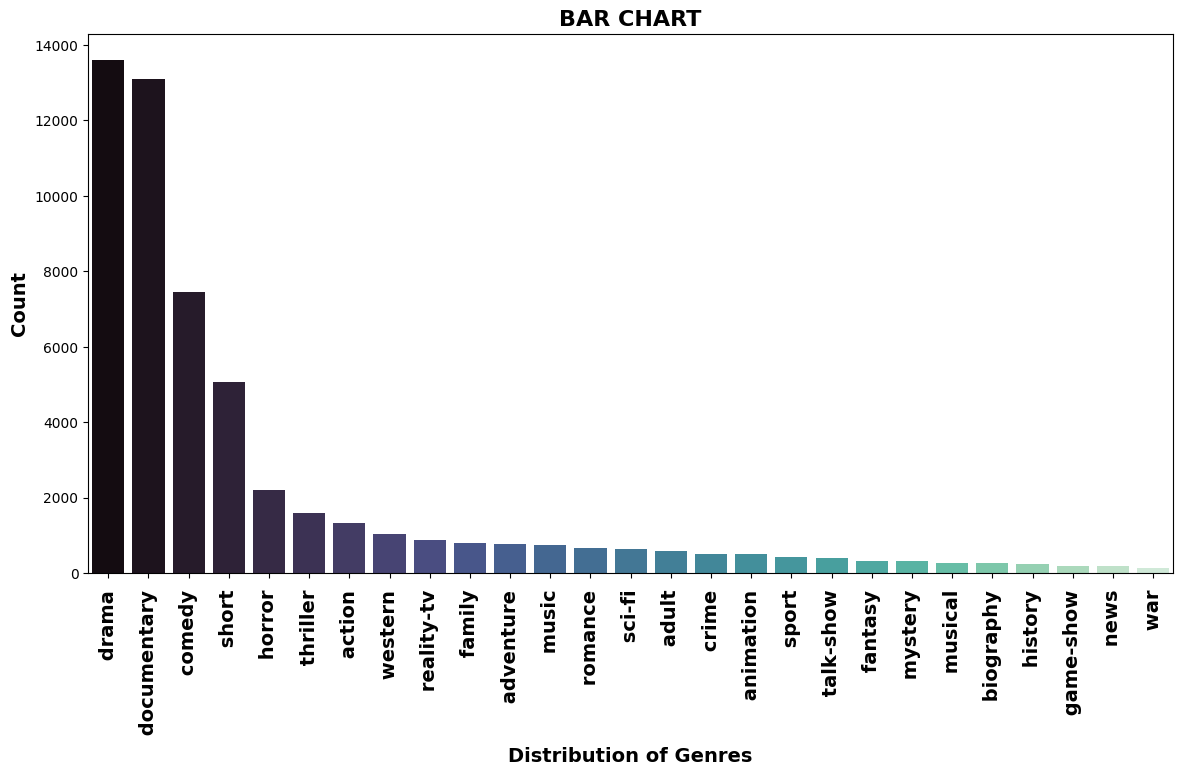

In [ ]:
plt.figure(figsize=(14, 7))
counts = train_data['Genre'].value_counts()
sns.barplot(x=counts.index, y=counts, palette='mako')
plt.xlabel('Distribution of Genres', fontsize=14, fontweight='bold')
plt.ylabel('Count', fontsize=14, fontweight='bold')
plt.title('BAR CHART', fontsize=16, fontweight='bold')
plt.xticks(rotation=90, fontsize=14, fontweight='bold')
plt.show()


In [ ]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 54214 entries, 1 to 54214
Data columns (total 3 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   Title        54214 non-null  object
 1   Genre        54214 non-null  object
 2   Description  54214 non-null  object
dtypes: object(3)
memory usage: 1.7+ MB


In [ ]:
train_data.describe()

,Title,Genre,Description
count,54214,54214,54214
unique,54214,27,54086
top,Oscar et la dame rose (2009),drama,Grammy - music award of the American academy ...
freq,1,13613,12


In [ ]:
train_data.isnull().sum()

Title          0
Genre          0
Description    0
dtype: int64

In [ ]:
import nltk
nltk.download('stopwords')


[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

In [ ]:
nltk.download('stopwords')

stop_words = set(stopwords.words('english'))
print(stop_words)


{'who', 'those', 'on', 'about', "wouldn't", 'an', 'your', 'them', 'same', 'i', 'him', "it's", 'that', 'if', 'no', 'its', 'between', 'yourselves', 'more', 'against', 'other', 'most', 'haven', 'am', 'below', 'myself', 'ain', 're', 'hasn', "doesn't", 'and', 'are', "couldn't", "that'll", 'we', 'through', 'didn', 'he', 'shan', 'because', 'until', 'as', 's', 'her', 'should', 'won', 'before', 'after', "haven't", 'own', 'm', 'does', 'these', "she's", "needn't", 'there', 'too', 'shouldn', 'out', 'y', "won't", 'wouldn', 'any', 'do', 'just', 'into', 'here', 'aren', "weren't", 'needn', "you're", "wasn't", 'will', 'be', 'how', 'yours', 'at', 'nor', 'theirs', 'ours', 'than', 'll', 'hadn', "you've", 'with', 'to', 'which', 'his', 'mightn', "hadn't", 'is', 'by', 'd', 'you', 'isn', 'when', 'doesn', 'down', 'off', 'then', 'both', 'while', 'in', 'couldn', "mightn't", 'yourself', 'ourselves', 'my', 'being', 'having', 'not', 'itself', 'they', 'did', "hasn't", 'wasn', 'don', "don't", 'o', "should've", 'such'

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [ ]:
nltk.download('punkt')
nltk.download('stopwords')


stop_words = set(stopwords.words('english'))


def clean_text(text):
    words = word_tokenize(text)
    words = [word for word in words if word.lower() not in stop_words]
    return ' '.join(words)

data = {
    'Description': ["This is a sample description.", "Another example description with more text."]
}
train_data = pd.DataFrame(data)

train_data['Text_cleaning'] = train_data['Description'].apply(clean_text)

print(train_data.head())


                                   Description  \
0                This is a sample description.   
1  Another example description with more text.   

                        Text_cleaning  
0                sample description .  
1  Another example description text .  


[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [ ]:
stemmer = LancasterStemmer()
stop_words = set(stopwords.words('english'))


def clean_text(text):
    text = text.lower()
    text = re.sub(r'@\S+', '', text)
    text = re.sub(r'http\S+', '', text)
    text = re.sub(r'pic.\S+', '', text)
    text = re.sub(r"[^a-zA-Z+']", ' ', text)
    text = re.sub(r'\s+[a-zA-Z]\s+', ' ', text + ' ')
    text = "".join([i for i in text if i not in string.punctuation])
    words = nltk.word_tokenize(text)
    stopwords = nltk.corpus.stopwords.words('english')
    text = " ".join([i for i in words if i not in stopwords and len(i) > 2])
    text = re.sub("\s[\s]+", " ", text).strip()
    return text


train_data['Text_cleaning'] = train_data['Description'].apply(clean_text)
test_data['Text_cleaning'] = test_data['Description'].apply(clean_text)

In [ ]:
print("shape before drop nulls",train_data.shape)
train_data = train_data.drop_duplicates()
print("shape after drop nulls",train_data.shape)

shape before drop nulls (2, 2)
shape after drop nulls (2, 2)


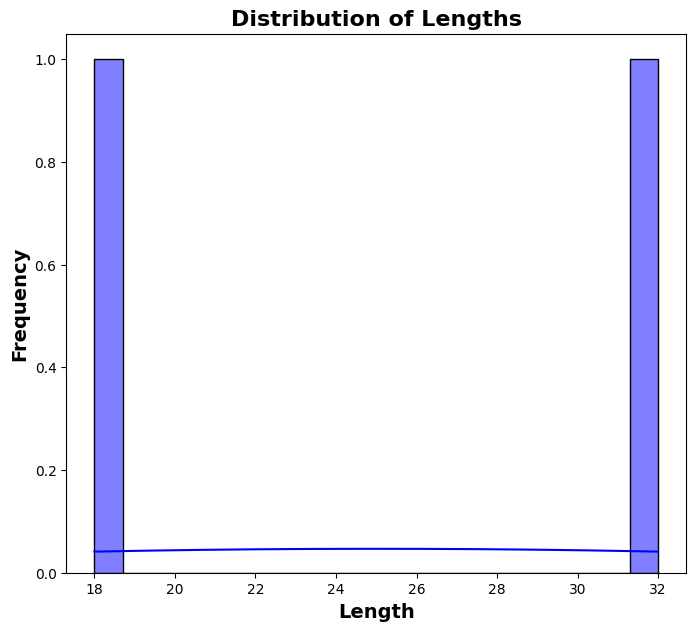

In [ ]:
import warnings
warnings.filterwarnings("ignore", "use_inf_as_na")

train_data['length_Text_cleaning'] = train_data['Text_cleaning'].apply(len)

plt.figure(figsize=(8, 7))
sns.histplot(data=train_data, x='length_Text_cleaning', bins=20, kde=True, color='blue')
plt.xlabel('Length', fontsize=14, fontweight='bold')
plt.ylabel('Frequency', fontsize=14, fontweight='bold')
plt.title('Distribution of Lengths', fontsize=16, fontweight='bold')
plt.show()

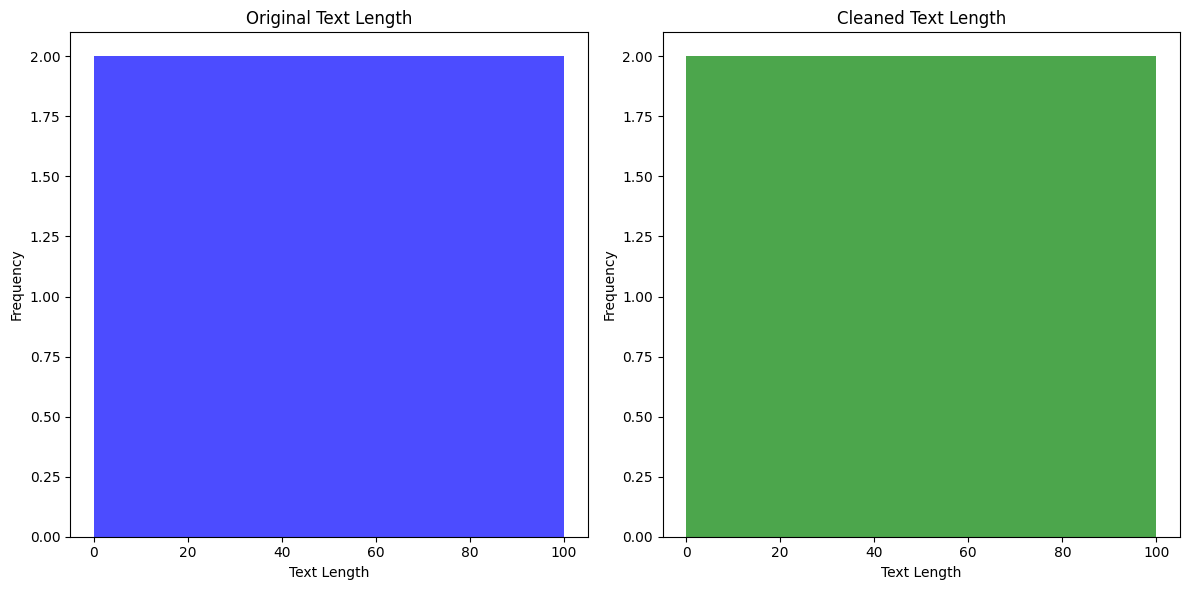

In [ ]:
plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
original_lengths = train_data['Description'].apply(len)
plt.hist(original_lengths, bins=range(0, max(original_lengths) + 100, 100), color='blue', alpha=0.7)
plt.title('Original Text Length')
plt.xlabel('Text Length')
plt.ylabel('Frequency')

plt.subplot(1, 2, 2)
cleaned_lengths = train_data['Text_cleaning'].apply(len)
plt.hist(cleaned_lengths, bins=range(0, max(cleaned_lengths) + 100, 100), color='green', alpha=0.7)
plt.title('Cleaned Text Length')
plt.xlabel('Text Length')
plt.ylabel('Frequency')

plt.tight_layout()
plt.show()

In [ ]:
tfidf_vectorizer = TfidfVectorizer()

X_train = tfidf_vectorizer.fit_transform(train_data['Text_cleaning'])

X_test = tfidf_vectorizer.transform(test_data['Text_cleaning'])

In [ ]:
nltk.download('punkt')
nltk.download('stopwords')

stop_words = set(stopwords.words('english'))

def clean_text(text):
    words = word_tokenize(text)
    words = [word for word in words if word.lower() not in stop_words]
    return ' '.join(words)

try:
    train_data = pd.read_csv("/content/gdrive/MyDrive/INTERNSHIP/codsoft/dataset/Genre Classification Dataset/train_data.txt",
                             sep=':::',
                             engine='python',
                             header=None,
                             names=['Title', 'Genre', 'Description'],
                             on_bad_lines='skip')
except pd.errors.ParserError as e:
    print("ParserError:", e)

print(train_data.columns)

if 'Description' in train_data.columns:
    train_data['Text_cleaning'] = train_data['Description'].apply(clean_text)
    print(train_data.head())
else:
    print("Column 'Description' not found in the data.")

X = train_data['Text_cleaning']
y = train_data['Genre']
print(f"Length of X: {len(X)}")
print(f"Length of y: {len(y)}")

print("Checking for missing values in X...")
print(X.isnull().sum())

print("Checking for missing values in y...")
print(y.isnull().sum())

train_data.dropna(subset=['Text_cleaning', 'Genre'], inplace=True)

X = train_data['Text_cleaning']
y = train_data['Genre']

X.reset_index(drop=True, inplace=True)
y.reset_index(drop=True, inplace=True)

X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42)

print(f"Length of X_train: {len(X_train)}")
print(f"Length of X_val: {len(X_val)}")
print(f"Length of y_train: {len(y_train)}")
print(f"Length of y_val: {len(y_val)}")


[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


Index(['Title', 'Genre', 'Description'], dtype='object')
                                Title       Genre  \
1       Oscar et la dame rose (2009)       drama    
2                       Cupid (1997)    thriller    
3   Young, Wild and Wonderful (1980)       adult    
4              The Secret Sin (1915)       drama    
5             The Unrecovered (2007)       drama    

                                         Description  \
1   Listening in to a conversation between his do...   
2   A brother and sister with a past incestuous r...   
3   As the bus empties the students for their fie...   
4   To help their unemployed father make ends mee...   
5   The film's title refers not only to the un-re...   

                                       Text_cleaning  
1  Listening conversation doctor parents , 10-yea...  
2  brother sister past incestuous relationship cu...  
3  bus empties students field trip Museum Natural...  
4  help unemployed father make ends meet , Edith ...  
5  film 's t

In [ ]:
vectorizer = TfidfVectorizer()
X_train_tfidf = vectorizer.fit_transform(X_train)
X_val_tfidf = vectorizer.transform(X_val)

# Initialize and train a Multinomial Naive Bayes Classifier
clf_NB = MultinomialNB()
clf_NB.fit(X_train_tfidf, y_train)

# Make predictions on the validation set
y_pred = clf_NB.predict(X_val_tfidf)

# Evaluate the classifier
from sklearn.metrics import accuracy_score, classification_report
accuracy = accuracy_score(y_val, y_pred)
report = classification_report(y_val, y_pred)

print(f"Accuracy: {accuracy}")
print(f"Classification Report:\n{report}")


Accuracy: 0.44729318454302314
Classification Report:
               precision    recall  f1-score   support

      action        0.00      0.00      0.00       263
       adult        0.00      0.00      0.00       112
   adventure        0.00      0.00      0.00       139
   animation        0.00      0.00      0.00       104
   biography        0.00      0.00      0.00        61
      comedy        0.68      0.04      0.08      1443
       crime        0.00      0.00      0.00       107
 documentary        0.54      0.91      0.67      2659
       drama        0.38      0.88      0.53      2697
      family        0.00      0.00      0.00       150
     fantasy        0.00      0.00      0.00        74
   game-show        0.00      0.00      0.00        40
     history        0.00      0.00      0.00        45
      horror        0.00      0.00      0.00       431
       music        0.00      0.00      0.00       144
     musical        0.00      0.00      0.00        50
     myster

In [ ]:
accuracy_NB = accuracy_score(y_val, y_pred)
accuracy_NB

0.44729318454302314

In [ ]:
X_val_tfidf = vectorizer.transform(X_val)


y_pred = clf_logreg.predict(X_val_tfidf)


from sklearn.metrics import accuracy_score, classification_report

accuracy = accuracy_score(y_val, y_pred)
report = classification_report(y_val, y_pred)

print(f"Accuracy: {accuracy}")
print(f"Classification Report:\n{report}")


Accuracy: 0.5824956192935534
Classification Report:
               precision    recall  f1-score   support

      action        0.56      0.21      0.30       263
       adult        0.87      0.18      0.30       112
   adventure        0.43      0.09      0.15       139
   animation        0.75      0.03      0.06       104
   biography        0.00      0.00      0.00        61
      comedy        0.53      0.59      0.56      1443
       crime        0.50      0.01      0.02       107
 documentary        0.65      0.87      0.75      2659
       drama        0.53      0.81      0.64      2697
      family        0.56      0.07      0.12       150
     fantasy        0.00      0.00      0.00        74
   game-show        0.93      0.33      0.48        40
     history        0.00      0.00      0.00        45
      horror        0.68      0.57      0.62       431
       music        0.66      0.38      0.48       144
     musical        0.00      0.00      0.00        50
     mystery

In [ ]:
accuracy_logreg = accuracy_score(y_val, y_pred)
accuracy_logreg

0.5824956192935534

In [ ]:
sum = accuracy_NB + accuracy_logreg
size1 = (accuracy_NB/sum)
size2 = (accuracy_logreg/sum)


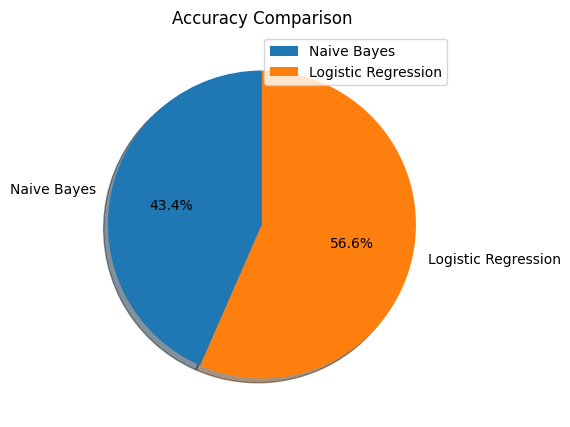

In [ ]:
labels = ['Naive Bayes', 'Logistic Regression']
sizes = [size1, size2]

# Plotting the pie chart
plt.figure(figsize=(5,5))
plt.pie(sizes, labels=labels, autopct='%1.1f%%', startangle=90, shadow = True)
plt.title('Accuracy Comparison')
plt.legend()
plt.show()